In [14]:
import pandas as pd
from datetime import datetime

from week2_helpers import variance_inflation_factor

import seaborn as sns; sns.set()

import statsmodels.api as sm

In [15]:
df = pd.read_csv("data/instagram_face_api.csv")

In [16]:
df["taken_at_timestamp"] = df["taken_at_timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df["timestamp_year"] = df["taken_at_timestamp"].apply(lambda x: x.year)
df["timestamp_month"] = df["taken_at_timestamp"].apply(lambda x: x.month)
df["timestamp_day"] = df["taken_at_timestamp"].apply(lambda x: x.day)

In [17]:
remove_cols = [
    "accessibility_caption",
    "caption_is_edited",
    "display_url",
    "taken_at_timestamp",
    "owner_id",
    "owner_username",
    "shortcode",
    "edge_media_to_comment_count" # Temporary
]

df = df.drop(columns=remove_cols)

In [18]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 109 columns):
dimensions_height                            3544 non-null int64
dimensions_width                             3544 non-null int64
edge_media_preview_like_count                3544 non-null int64
owner_followers                              3544 non-null float64
owner_following                              3544 non-null int64
owner_is_verified                            3544 non-null bool
owner_posts                                  3544 non-null int64
faceAttributes_accessories_glasses           3544 non-null float64
faceAttributes_accessories_headwear          3544 non-null float64
faceAttributes_accessories_mask              3544 non-null float64
faceAttributes_age                           3544 non-null float64
faceAttributes_blur_blurLevel                3544 non-null object
faceAttributes_blur_value                    3544 non-null float64
faceAttributes_emotion_anger       

In [ ]:
faceAttributes_age                           

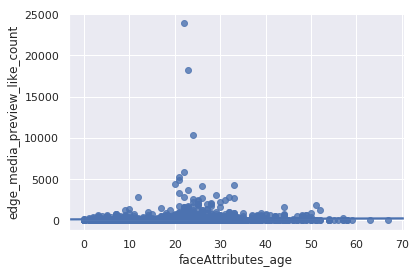

In [12]:
age_likes = sns.regplot(x="faceAttributes_age", y="edge_media_preview_like_count", data=df)

In [10]:
gender = df["faceAttributes_gender"].value_counts()

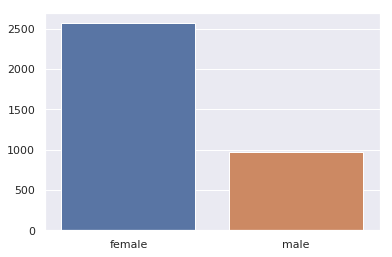

In [13]:
gender_likes = sns.barplot(x=gender.index, y=gender.values)

In [ ]:
cat_cols = [
    "faceAttributes_blur_blurLevel",         # [low, medium, high]
    "faceAttributes_exposure_exposureLevel", # [underExposure, goodExposure, overExposure]
    "faceAttributes_gender",                 # [female, male]
    "faceAttributes_glasses",                # [NoGlasses, ReadingGlasses, Sunglasses, SwimmingGoggles]
    "faceAttributes_noise_noiseLevel"        # [low, medium, high]
]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df = df.dropna()

In [ ]:
y = df.pop("edge_media_preview_like_count")

In [ ]:
x = sm.add_constant(df.astype(float))
model = sm.OLS(y, x).fit()
print(model.summary())

In [ ]:
vif = variance_inflation_factor(x.astype(float))
df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p"], align='mid', color=['#d65f5f', '#5fba7d'])

In [ ]:
df_vif = x.loc[:, vif["vif"] <= 5]

In [ ]:
# Rerun regression
x_vif = sm.add_constant(df.astype(float))
model_vif = sm.OLS(y, x_vif).fit()
print(model_vif.summary())

In [ ]:
vif = variance_inflation_factor(df_vif.astype(float))
df_coeffs = pd.DataFrame({"Coefficients": model_vif.params, "p": model_vif.pvalues, "vif": vif["vif"]})
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])